In [1]:
import keras
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the data from csv
adv = pd.read_csv(r"C:\Users\rohan\OneDrive\Desktop\local dataset\advertising (1).csv")
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# data cleaning and analysis
# data visualization
#encoding(if required)

In [4]:
#ip/op creation:-
ip=adv.drop('Sales', axis=1)
ip.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [5]:
op=adv.Sales
op.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [6]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ip, op, test_size=0.2)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [8]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [9]:
#model tranning
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [10]:
model = Sequential()
#input & 1st hiddenlayer
model.add(Dense(30, input_dim =3 , activation='linear'))
#2nd hiddenlayer
model.add(Dense(25, activation='linear'))
model.add(Dense(15, activation='linear'))

#output layer
model.add(Dense(1, activation='linear'))
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

c:\Users\rohan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │           775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,301 (5.08 KB)

 Trainable params: 1,301 (5.08 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(x_train, y_train, epochs=20,validation_data=(x_test, y_test))

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 243.5088 - val_loss: 207.9973
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 175.7447 - val_loss: 137.3753
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 98.0638 - val_loss: 48.0470
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 24.5247 - val_loss: 5.9853
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 15.9871 - val_loss: 12.0990
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 13.7869 - val_loss: 3.4091
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.1480 - val_loss: 4.5241
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.9045 - val_loss: 5.2489
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.5546 - val_loss: 4.0981
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.6240 - val_loss: 2.2346
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.3354 - val_loss: 2.2005
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.2026 - val_

In [13]:
pred=model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step 


In [14]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,pred)
r2=r2_score(y_test,pred)
print("MSE:",mse)
print("R2 Score:",r2)

MSE: 2.2832902014564125
R2 Score: 0.8739262046343949


### multi-layered perceptron model for classication model having categorical output column

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
iris = pd.read_csv(r"C:\Users\rohan\OneDrive\Desktop\local dataset\iris.csv",header=None)

In [17]:
iris.head()

,0,1,2,3,4,5
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa


In [28]:
iris1.columns = iris1.iloc[0]
iris1 = iris1.iloc[1:]
iris1 = iris1.reset_index(drop=True)

iris1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
iris1.shape

(150, 5)

In [30]:
iris1.columns = ['SL','SW','PL','PW','Flower']
iris1.head()

,SL,SW,PL,PW,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
#encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
iris1.Flower = le.fit_transform(iris1.Flower)
iris1.Flower.unique()

array([0, 1, 2])

In [33]:
le.inverse_transform([0,1,2])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [34]:
#ip/op creation:
ip=iris1.drop('Flower',axis=1)
op=iris1.Flower

In [36]:
# to_categorical
from keras.utils import to_categorical
op= to_categorical(op)
op

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.2)

In [38]:
# standard scaler 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [39]:
#model tranning
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [40]:
model =Sequential()
#imput &hidden layer
model.add(Dense(25,input_dim=4,activation ='sigmoid'))

#some more hidden layers
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(15,activation='sigmoid'))

#output layer
model.add(Dense(3,activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy',metrics=['accuracy'])

c:\Users\rohan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 25)             │           125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            48 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,008 (3.94 KB)

 Trainable params: 1,008 (3.94 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=25)

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.3167 - loss: 1.1184 - val_accuracy: 0.2333 - val_loss: 1.1233
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3583 - loss: 1.0909 - val_accuracy: 0.2333 - val_loss: 1.1542
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3583 - loss: 1.0718 - val_accuracy: 0.3000 - val_loss: 1.0717
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5917 - loss: 1.0352 - val_accuracy: 0.8667 - val_loss: 1.0140
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6917 - loss: 1.0036 - val_accuracy: 0.7000 - val_loss: 0.9664
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7417 - loss: 0.9441 - val_accuracy: 0.9000 - val_loss: 0.9187
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9250 - loss: 0.8672 - val_accuracy: 0.8667 - val_loss: 0.8492
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8917 - loss: 0.7758 - val_accuracy: 0.9333 - val_loss: 0.7558

In [43]:
pred1 =model.predict(x_test)
pred1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


array([[2.4256948e-03, 9.7088270e-02, 9.0048599e-01],
       [2.0023477e-03, 7.9012819e-02, 9.1898477e-01],
       [5.4299482e-03, 2.2401828e-01, 7.7055186e-01],
       [9.6292424e-01, 3.6411535e-02, 6.6416227e-04],
       [9.6211767e-01, 3.7203763e-02, 6.7856605e-04],
       [7.2114736e-02, 9.0150601e-01, 2.6379291e-02],
       [9.0950979e-03, 3.8358235e-01, 6.0732251e-01],
       [2.2035560e-02, 8.5403556e-01, 1.2392892e-01],
       [9.6048027e-01, 3.8811825e-02, 7.0799730e-04],
       [4.8540365e-03, 2.0021856e-01, 7.9492742e-01],
       [2.1910230e-03, 8.6735159e-02, 9.1107380e-01],
       [9.0976022e-03, 3.9409798e-01, 5.9680438e-01],
       [2.5483032e-03, 1.0254922e-01, 8.9490247e-01],
       [9.6074760e-01, 3.8549576e-02, 7.0287415e-04],
       [3.3911776e-02, 9.2065620e-01, 4.5431983e-02],
       [2.2569932e-03, 8.9941695e-02, 9.0780133e-01],
       [9.6115083e-01, 3.8153466e-02, 6.9569016e-04],
       [9.3769264e-01, 6.1184607e-02, 1.1227244e-03],
       [3.1909416e-03, 1.304

In [44]:
prediction =np.argmax(pred1,axis=1)
prediction

array([2, 2, 2, 0, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 0, 1])

In [46]:
y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [47]:
y = np.argmax(y_test,axis=1)
y

array([2, 2, 2, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 0, 1])

In [50]:
from sklearn.metrics import precision_score,accuracy_score, recall_score, f1_score
acc=accuracy_score(y,prediction)
rec =recall_score(y,prediction,average='micro')
pre=precision_score(y,prediction,average='micro')
f1=f1_score(y,prediction,average='micro')
print("Accuracy:",acc)
print("Recall:",rec)
print("Precision:",pre)
print("F1 Score:",f1)

Accuracy: 0.9
Recall: 0.9
Precision: 0.9
F1 Score: 0.9


### ann using mnist  dataset:-

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow


In [53]:
from keras.datasets import mnist 

In [54]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [57]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [58]:
set(y_train)

{np.uint8(0),
 np.uint8(1),
 np.uint8(2),
 np.uint8(3),
 np.uint8(4),
 np.uint8(5),
 np.uint8(6),
 np.uint8(7),
 np.uint8(8),
 np.uint8(9)}

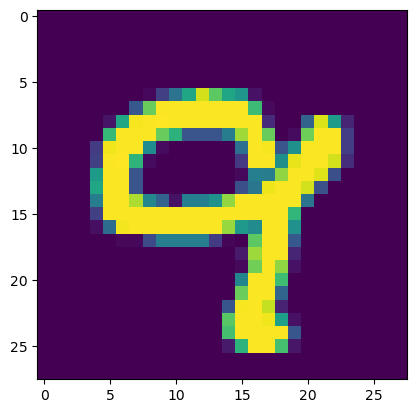

In [61]:
plt.imshow(x_train[y_train==9][1000])

In [64]:
for i in range (10):
    print(i,':',len(x_train[y_train==i]))

0 : 5923
1 : 6742
2 : 5958
3 : 6131
4 : 5842
5 : 5421
6 : 5918
7 : 6265
8 : 5851
9 : 5949


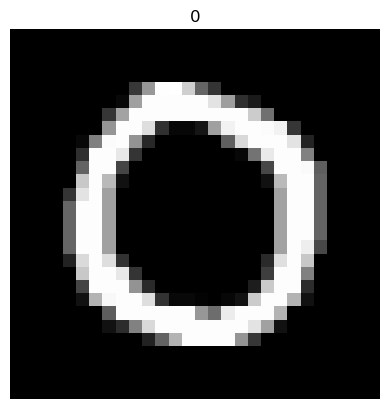

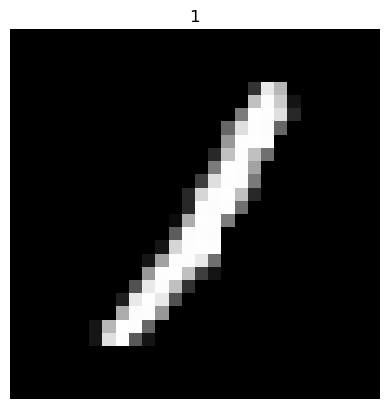

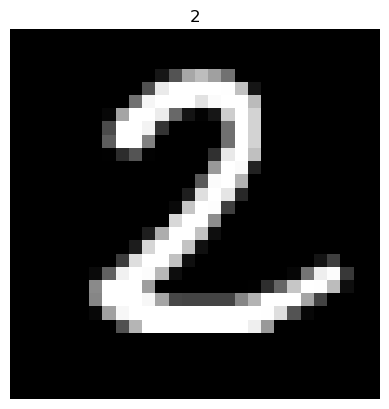

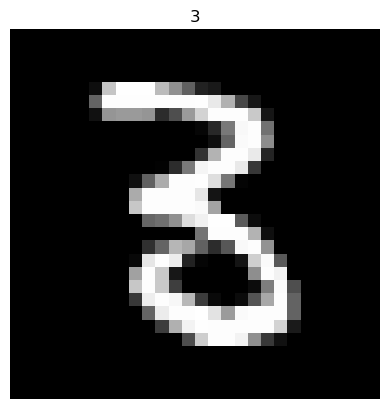

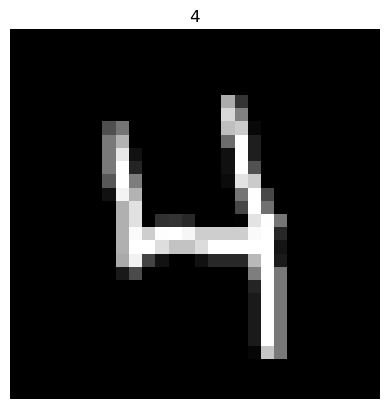

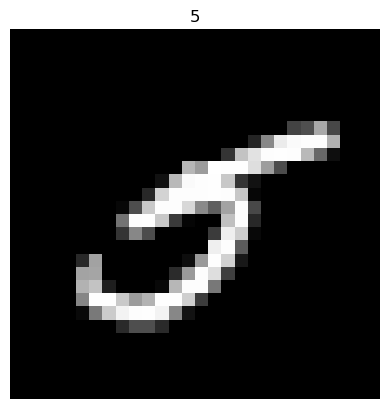

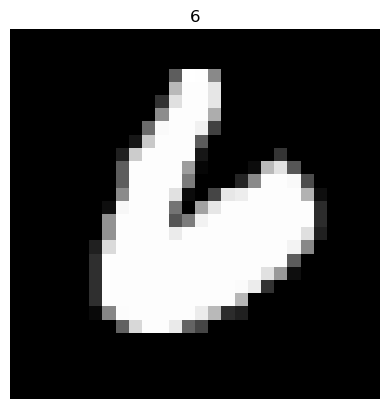

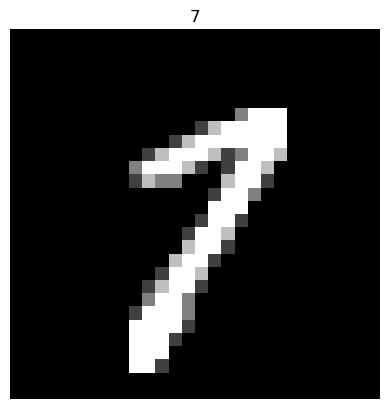

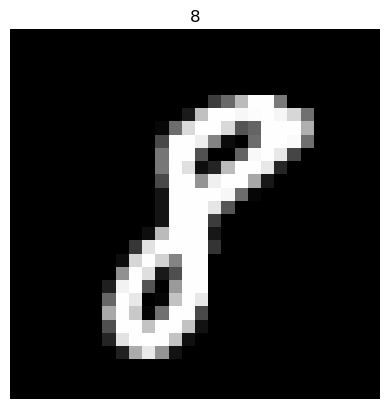

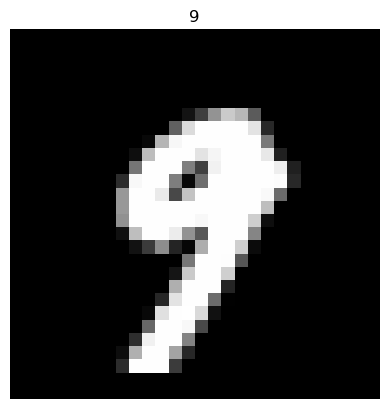

In [65]:
for i in range (10):
    plt.imshow(x_train[y_train==i][np.random.randint(0,5000)],cmap='gray')
    plt.title(str(i))
    plt.axis('off')
    plt.show()

In [66]:
#to _categorical
from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [67]:
x_train =x_train/255
x_test = x_test/255

In [69]:
x_train.shape

(60000, 28, 28)

In [70]:
# Converting the input data into 1D.
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [71]:
x_train.shape

(60000, 784)

In [72]:
#model tranning
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [73]:
model = Sequential()
# input & 1st hidden layer:
model.add(Dense(40,input_dim=784,activation='relu'))
# hidden layer:
model.add(Dense(30,activation='relu'))
model.add(Dense(25,activation='relu'))
# output layer:
model.add(Dense(10,activation='softmax'))
model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

c:\Users\rohan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 40)             │        31,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 30)             │         1,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 25)             │           775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,665 (131.50 KB)

 Trainable params: 33,665 (131.50 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=25)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9112 - loss: 0.3057 - val_accuracy: 0.9427 - val_loss: 0.2181
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9456 - loss: 0.1997 - val_accuracy: 0.9549 - val_loss: 0.1662
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9522 - loss: 0.1792 - val_accuracy: 0.9518 - val_loss: 0.1777
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9561 - loss: 0.1686 - val_accuracy: 0.9550 - val_loss: 0.1704
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9615 - loss: 0.1488 - val_accuracy: 0.9599 - val_loss: 0.1616
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9624 - loss: 0.1435 - val_accuracy: 0.9568 - val_loss: 0.1770
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9639 - loss: 0.1401 - val_accuracy: 0.9606 - val_loss: 0.1854
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9660 - loss: 0.1350 - 

In [76]:
pred2 =model.predict(x_test)
pred2

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[7.92596457e-12, 1.76695811e-11, 4.46712147e-05, ...,
        9.99688864e-01, 3.34409793e-15, 2.65237846e-04],
       [1.03823006e-10, 3.41200888e-07, 9.99051750e-01, ...,
        5.15912325e-05, 7.05774017e-09, 4.71181815e-36],
       [1.12405697e-28, 1.00000000e+00, 3.42056044e-24, ...,
        9.07928333e-12, 2.13280782e-10, 4.89162908e-21],
       ...,
       [6.00262781e-32, 2.30873347e-18, 1.24987250e-15, ...,
        1.22527584e-17, 4.76339354e-35, 6.66148514e-09],
       [0.00000000e+00, 2.19428309e-36, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.73989348e-10, 4.52791254e-14, 3.30133720e-22, ...,
        1.65677951e-35, 2.17149649e-11, 8.32975534e-30]], dtype=float32)

In [77]:
prediction =np.argmax(pred2,axis=1)
prediction

array([7, 2, 1, ..., 4, 5, 6])